# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


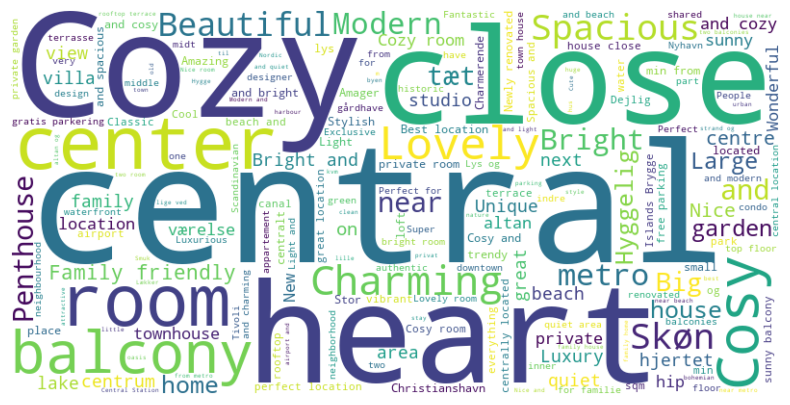

In [90]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

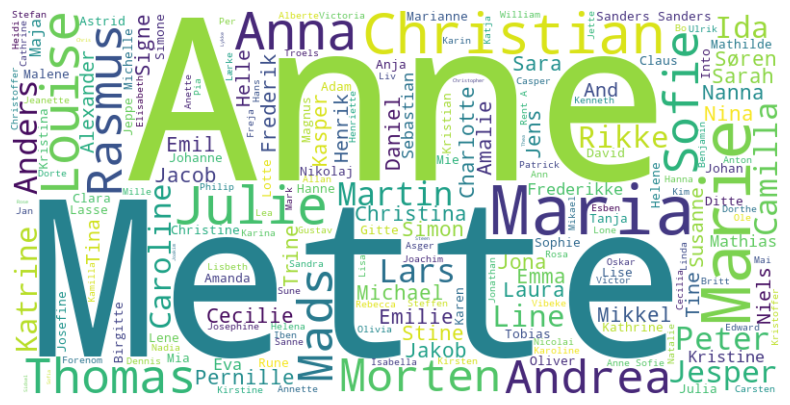

In [91]:
stop_words = ['og', '&', ' ', 'Og', 'OG', 'ApartmentinCopenhagen', 'Place', 'Denmark', 'This', 'Copenhagen']

texts = ' '.join(data_filtered['host_name'].astype(str))

wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400, prefer_horizontal=0.7).generate(texts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [92]:
# Display the top 10 most used host names
data_filtered["host_name"].value_counts().head(10)

host_name
ApartmentinCopenhagen    134
Mette                    131
Christian                116
Julie                    107
Maria                    104
Anne                      96
Anna                      96
Mads                      94
Rasmus                    92
Louise                    92
Name: count, dtype: int64

#### Observation

By comparing the name distribution from Danmarks Statistik with our WordCloud, we can see a clear similarity. In the TOP 10 most used (person) host names from our WordCloud, all except Maria are also found in the official statistics.

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

In [93]:
# pip install plotly
import plotly.graph_objects as go

# Generate different colors for each neighbourhood
neighbourhood_colors = {neighbourhood: f'rgba({i*10 % 255}, {i*20 % 255}, {i*30 % 255})' for i, neighbourhood in enumerate(neighbourhoods)}

fig = go.Figure()

for neighbourhood in neighbourhoods:
    filtered_data = data_filtered[data_filtered['neighbourhood_cleansed'] == neighbourhood]
    fig.add_trace(go.Scattermap(
        lat=filtered_data.latitude,
        lon=filtered_data.longitude,
        mode="markers",
        marker=dict(
            size=5,
            color=neighbourhood_colors[neighbourhood],
            opacity=0.4
        ),
        name=neighbourhood
    ))

fig.update_layout(
    hovermode='closest',
    map=dict(
        style='open-street-map',
        center=dict(
            lat=55.68,
            lon=12.56
        ),
        zoom=11,
    ),
    width=1200,
    height=800
)

fig.show()


### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighbourhoods to create different plots (your choice).

In this section, we will explore the relationship between features of AirBnB listings in Copenhagen and the neighbourhoods they are located in using boxplots.

Objective:
- To understand how the price of AirBnB listings varies across different neighbourhoods in Copenhagen.
- To see yearly availability of AirBnB listings across different neighbourhoods in Copenhagen.

#### **Prices by Neigbourhoods**

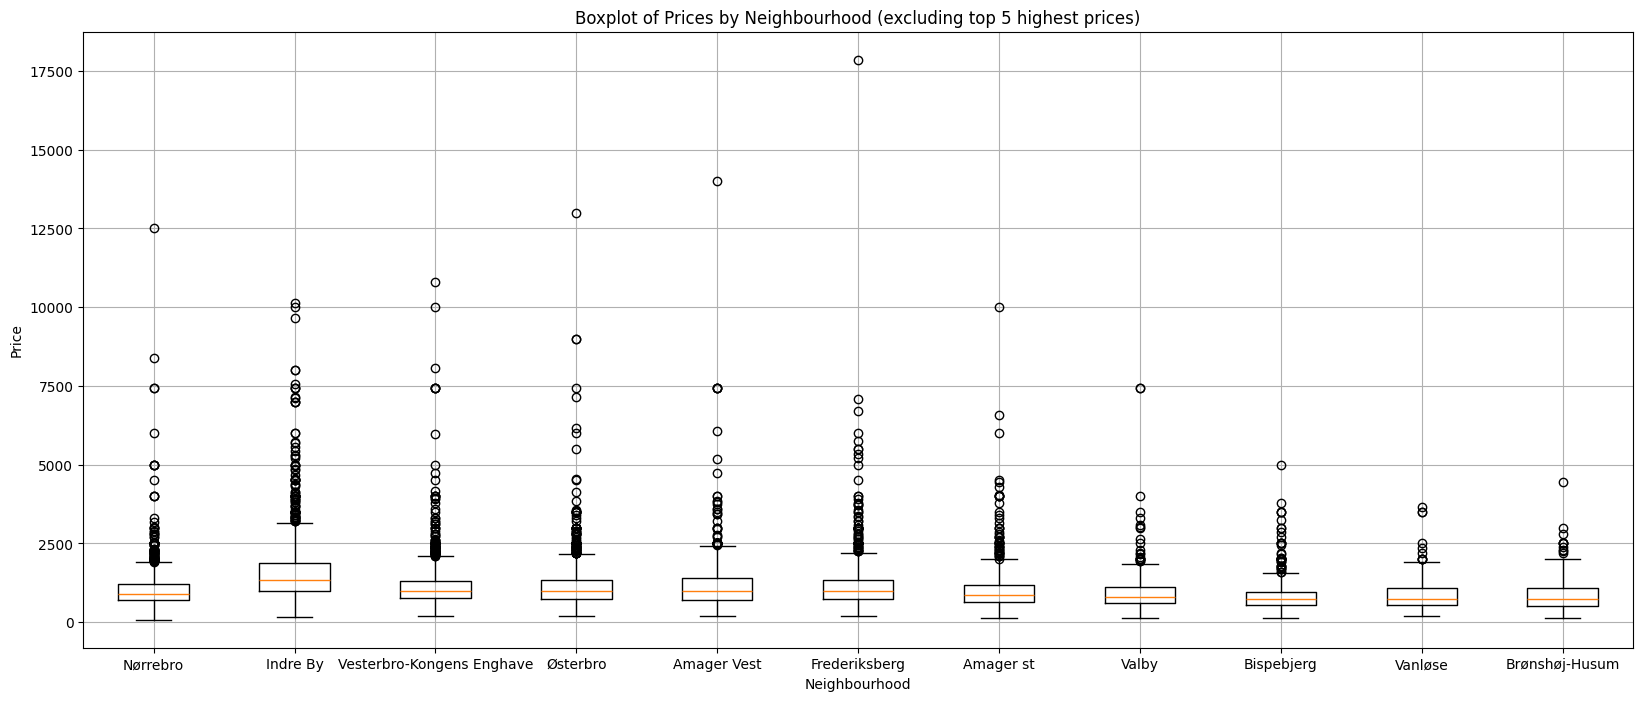

In [94]:
# Remove the top 5 highest prices
top_5_prices = data_filtered['price'].nlargest(5)
data_filtered_no_top_5 = data_filtered[~data_filtered['price'].isin(top_5_prices)]

plt.figure(figsize=(20, 8))
plt.boxplot([data_filtered_no_top_5[data_filtered_no_top_5['neighbourhood_cleansed'] == neighbourhood]['price'] for neighbourhood in neighbourhoods], tick_labels=neighbourhoods)

plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Boxplot of Prices by Neighbourhood (excluding top 5 highest prices)')
plt.grid()
plt.show()

#### Observation

We can see that the neighbourhoods have roughly normal distribution of data with a number of outliers within each of them. Since the prices follow a normal distribution, the majority of the listings are priced near the average or median price for that neighbourhood. Notably neighbourhoods like Østerbro, Frederiksberg show a higher density of outliers, suggesting these areas have more premium proprietes, but not the extreme luxury of the market.

_Note: The top 5 highest prices were removed to improve visualization, as their outlier positions made the plot harder to interpret._

#### **Yearly Availability by Neighbourhood**

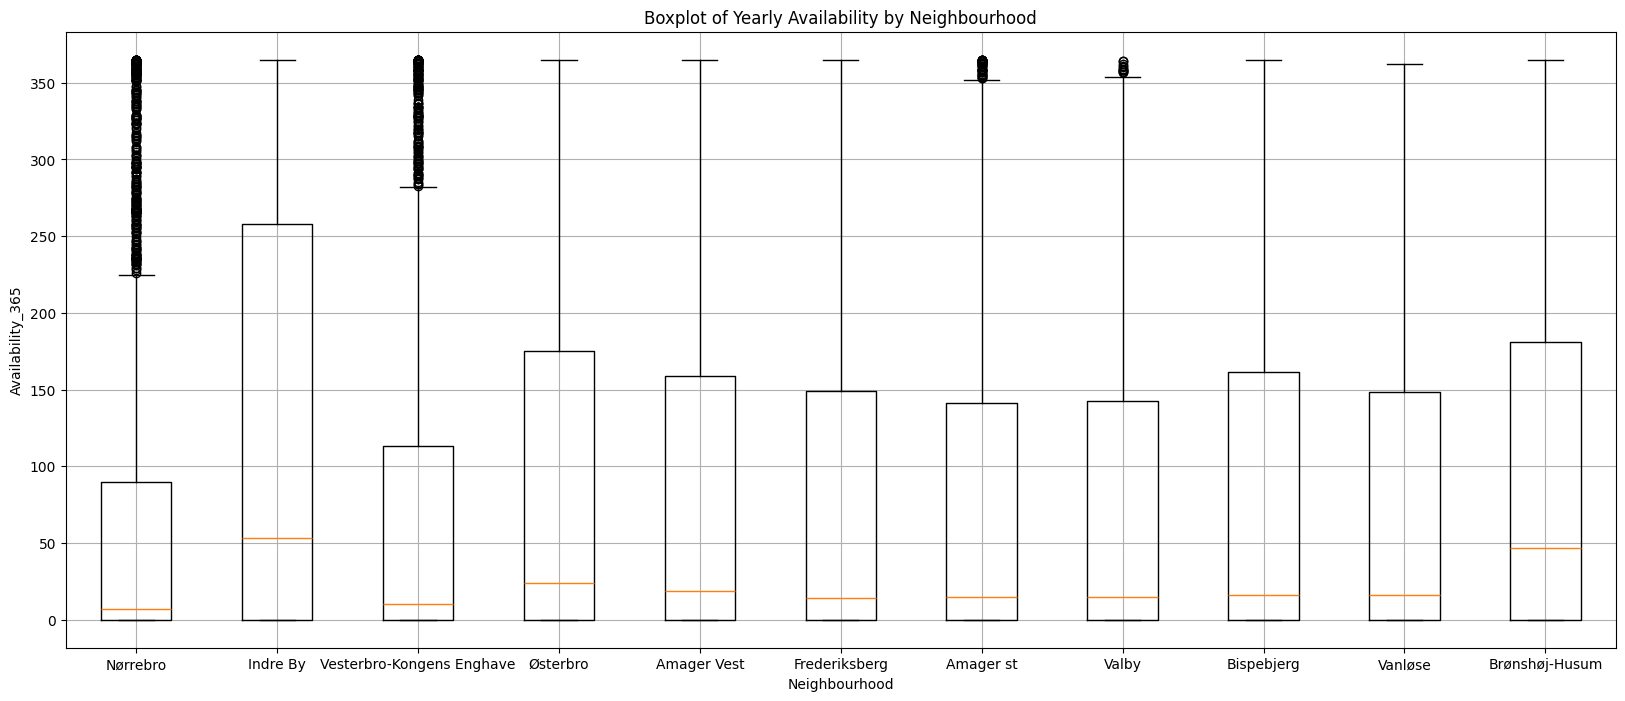

In [95]:
plt.figure(figsize=(20, 8))
plt.boxplot([data_filtered[data_filtered['neighbourhood_cleansed'] == neighbourhood]['availability_365'] for neighbourhood in neighbourhoods], tick_labels=neighbourhoods)

plt.xlabel('Neighbourhood')
plt.ylabel('Availability_365')
plt.title('Boxplot of Yearly Availability by Neighbourhood')
plt.grid()
plt.show()

#### Observation

We can see that all of the neighbourhoods have positive skew, meaning that the distribution has more data points on the lower end, with only a few values pulling in up.

The availability all year round varies significantly across Copenhagen's neighbourhoods, the presence of numerous outliers (dots) at the top of most neighbourhoods indicates there are some properties that are available almost year-round in every area, though their proportion varies by neighbourhood.

#### **Rating by Neighbourhood**

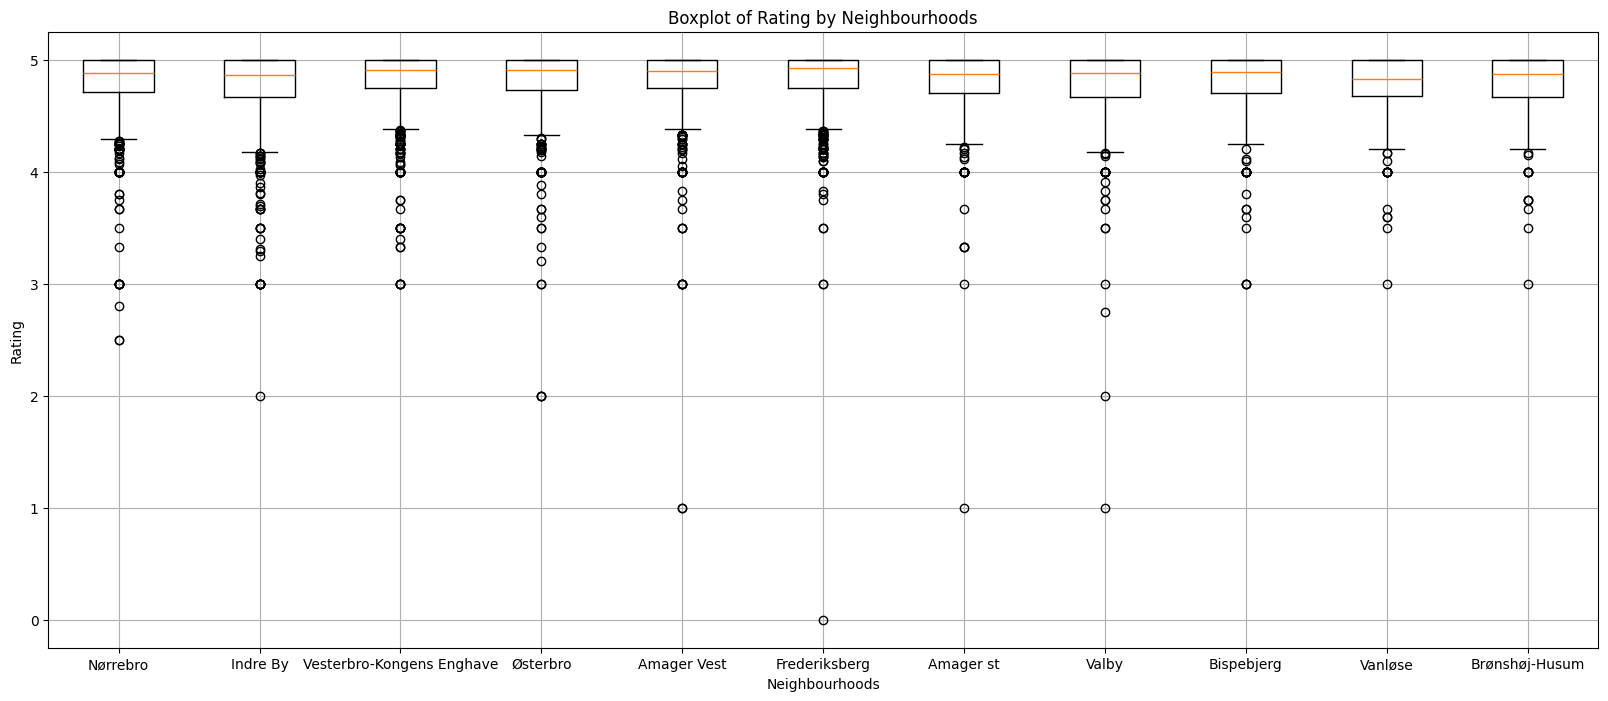

In [96]:
plt.figure(figsize=(20, 8))
plt.boxplot([data_filtered[data_filtered['neighbourhood_cleansed'] == neighbourhood]['review_scores_rating'] for neighbourhood in neighbourhoods], tick_labels=neighbourhoods)

plt.xlabel('Neighbourhoods')
plt.ylabel('Rating')
plt.title('Boxplot of Rating by Neighbourhoods')
plt.grid()
plt.show()


#### Observation

We can see the scores across all neighbourhoods are generally high, with median ratings consistently around 4.5-5.0. However, there are some notable outliers in every neighbourhood, particularly on the lower end. The distribution of ratings shows that while most properties maintain high standards, there are occasional listings that significantly underperform.


### 4. Do a descriptive analysis of the neighbourhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

### **AirBnB Neighbourhoods Analysis**

The analysis of the neighbourhoods based on **room type** and **price** gives us an overview on the distribution and characteristics of AirBnB listings in Copenhagen. By examining various statistical measures such as mean, median, minimum, maximum, standard deviation, and quartiles, we can gain insights into the pricing trends and availability across different neighbourhoods. This analysis helps in identifying areas with higher or lower rental prices, as well as the types of accommodations that are commonly occurring in each neighbourhood.

- [Mean Price](#mean-price-in-neighbourhoods)
- [Median Price](#median-price)
- [Minimum Price](#minimum-price-per-room-type)
- [Maximum Price](#maximum-price-per-room-type)
- [Deviation](#standard-deviationvariance)
- [Quartile Price](#quartiles)

In [97]:
# df4 = data filtered for 4th exercise
df4 = data_filtered.groupby(['neighbourhood_cleansed', 'room_type'])

#### **Mean price in Neighbourhoods**

The mean price varies based on the room type and the neighbourhood. As we can see on the plot below, the mean price is usually on the same level for the room types across the neighbourhoods except for Amager St which has extremely high mean price for the shared room.

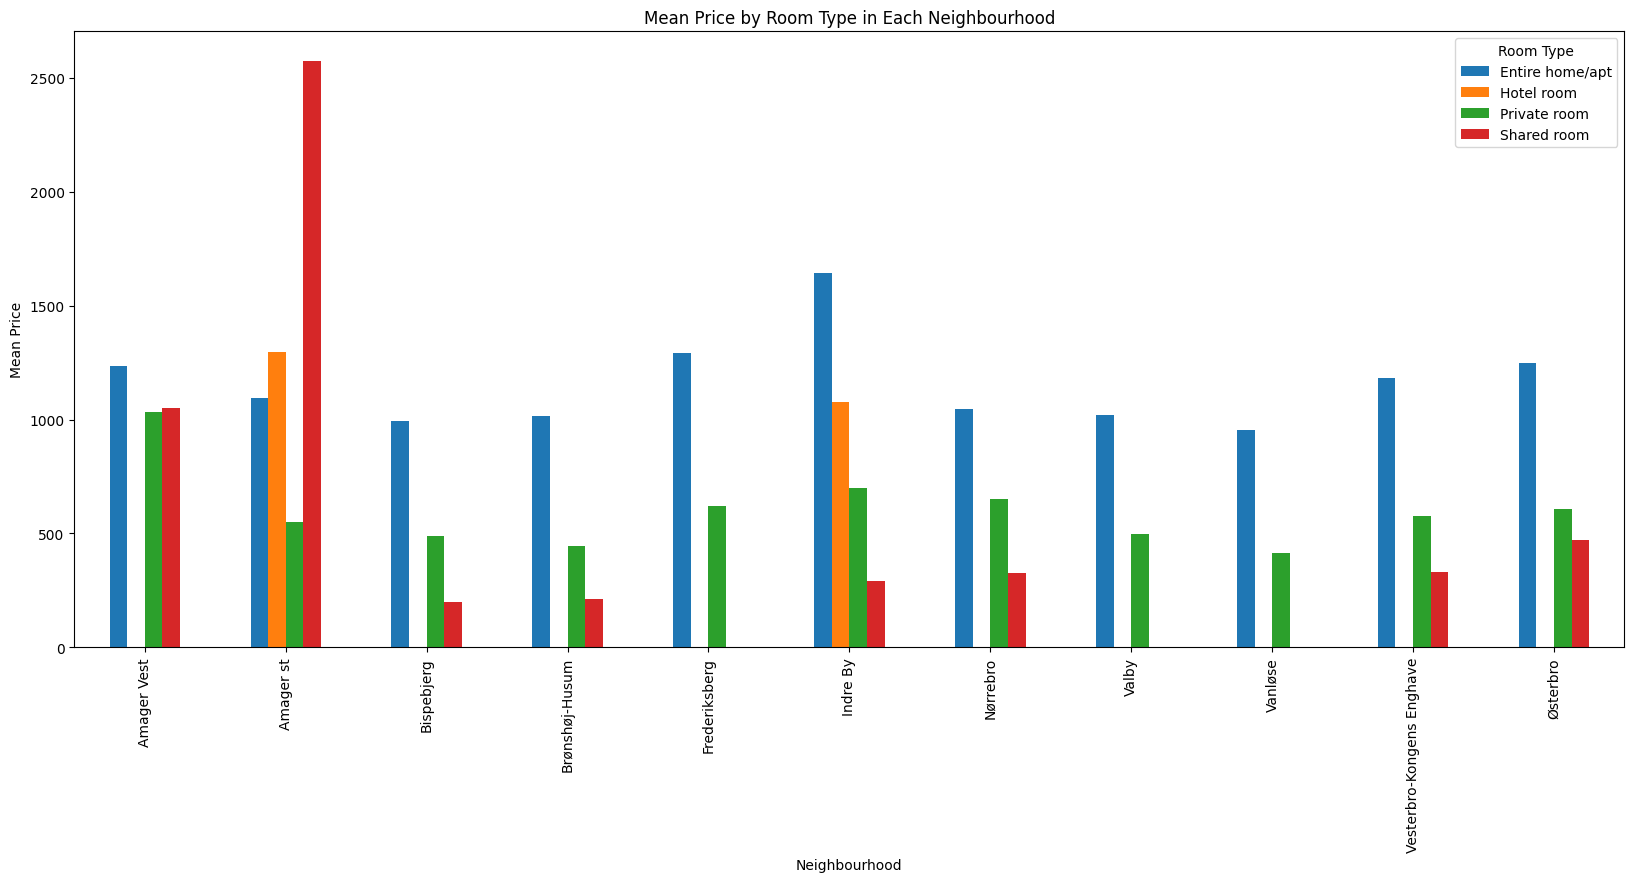

In [98]:
mean_data = df4['price'].mean().unstack()
mean_data.plot.bar(figsize=(20,8))

plt.xlabel("Neighbourhood")
plt.ylabel("Mean Price")
plt.title("Mean Price by Room Type in Each Neighbourhood")
plt.legend(title="Room Type")

plt.show()


#### **Median Price**

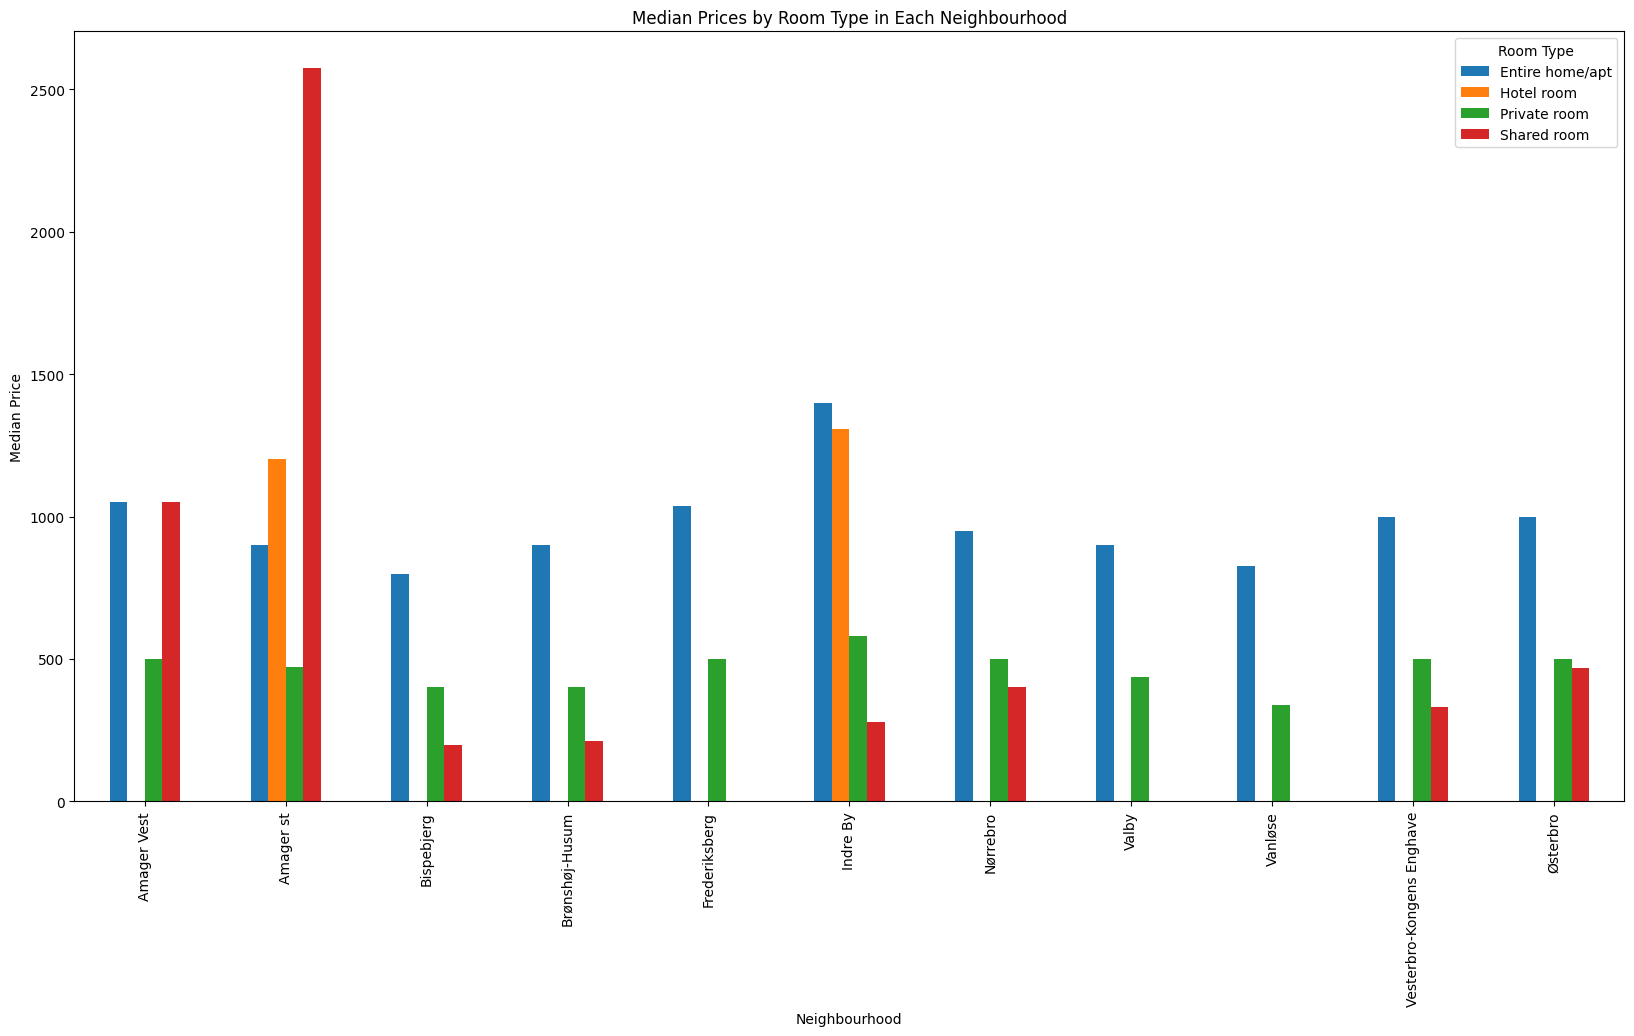

In [99]:
df4.price.median().unstack().plot.bar(figsize=(20, 10))

plt.xlabel("Neighbourhood")
plt.ylabel("Median Price")
plt.title("Median Prices by Room Type in Each Neighbourhood")
plt.legend(title="Room Type")

plt.show()

#### **Minimum Prices**

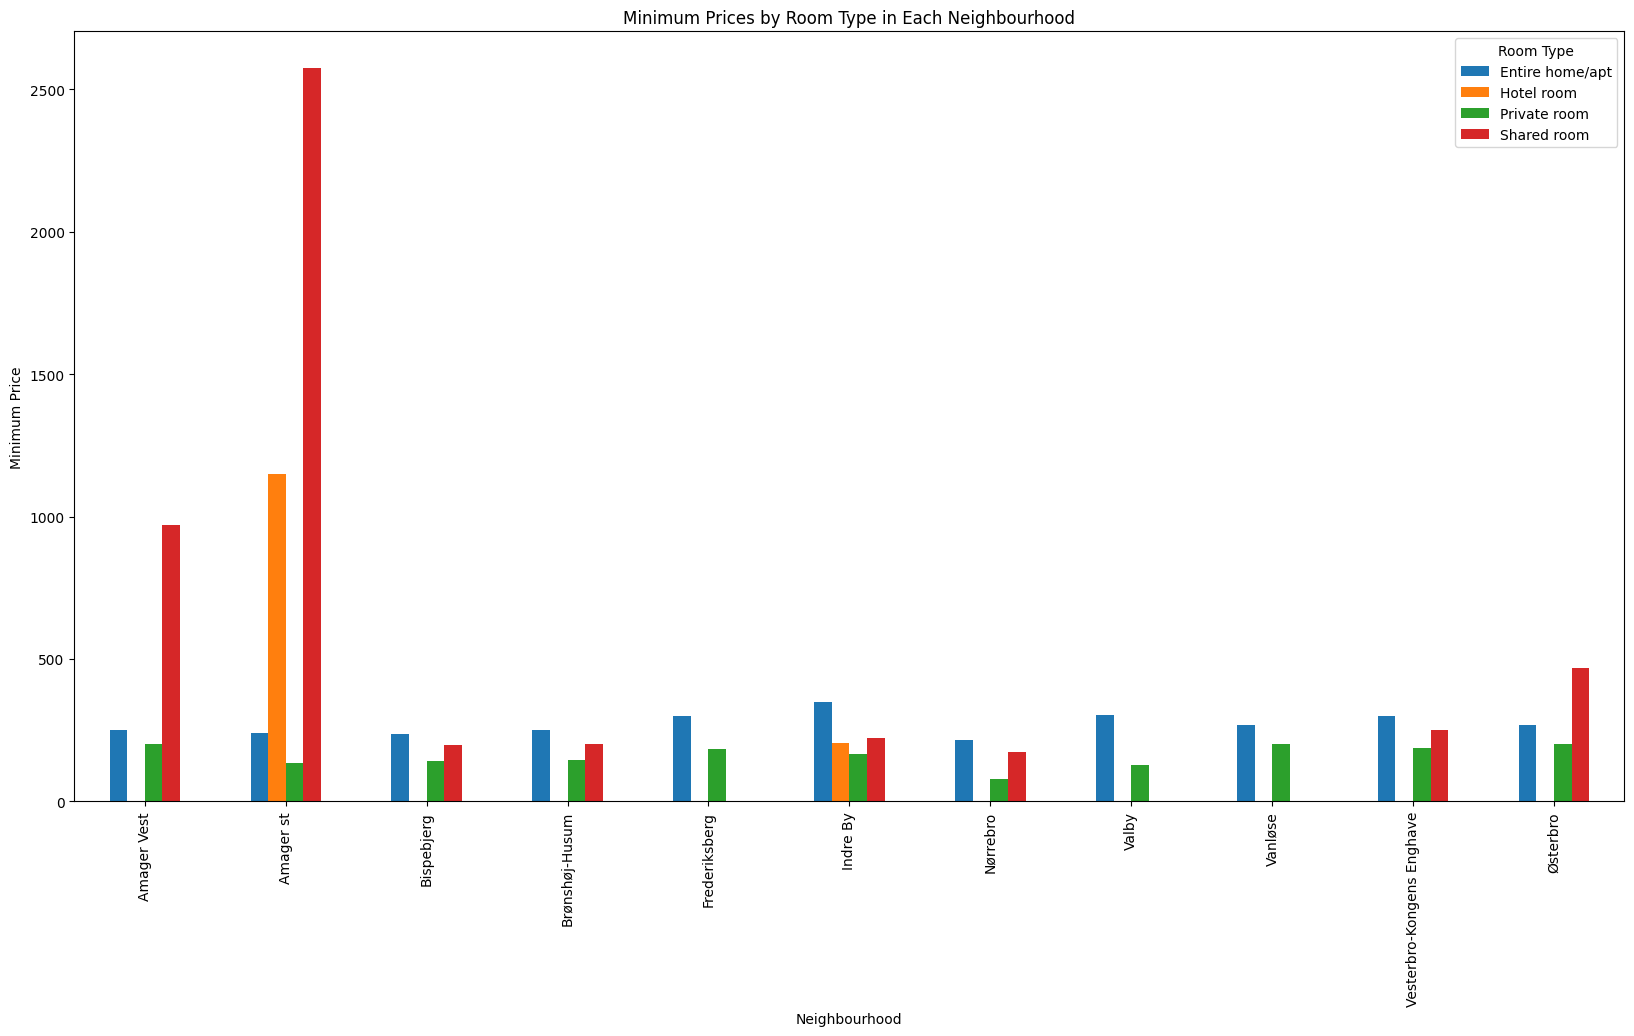

In [100]:
df4.price.min().unstack().plot.bar(figsize=(20, 10))

plt.xlabel("Neighbourhood")
plt.ylabel("Minimum Price")
plt.title("Minimum Prices by Room Type in Each Neighbourhood")
plt.legend(title="Room Type")

plt.show()

#### **Maximum price per Room type**

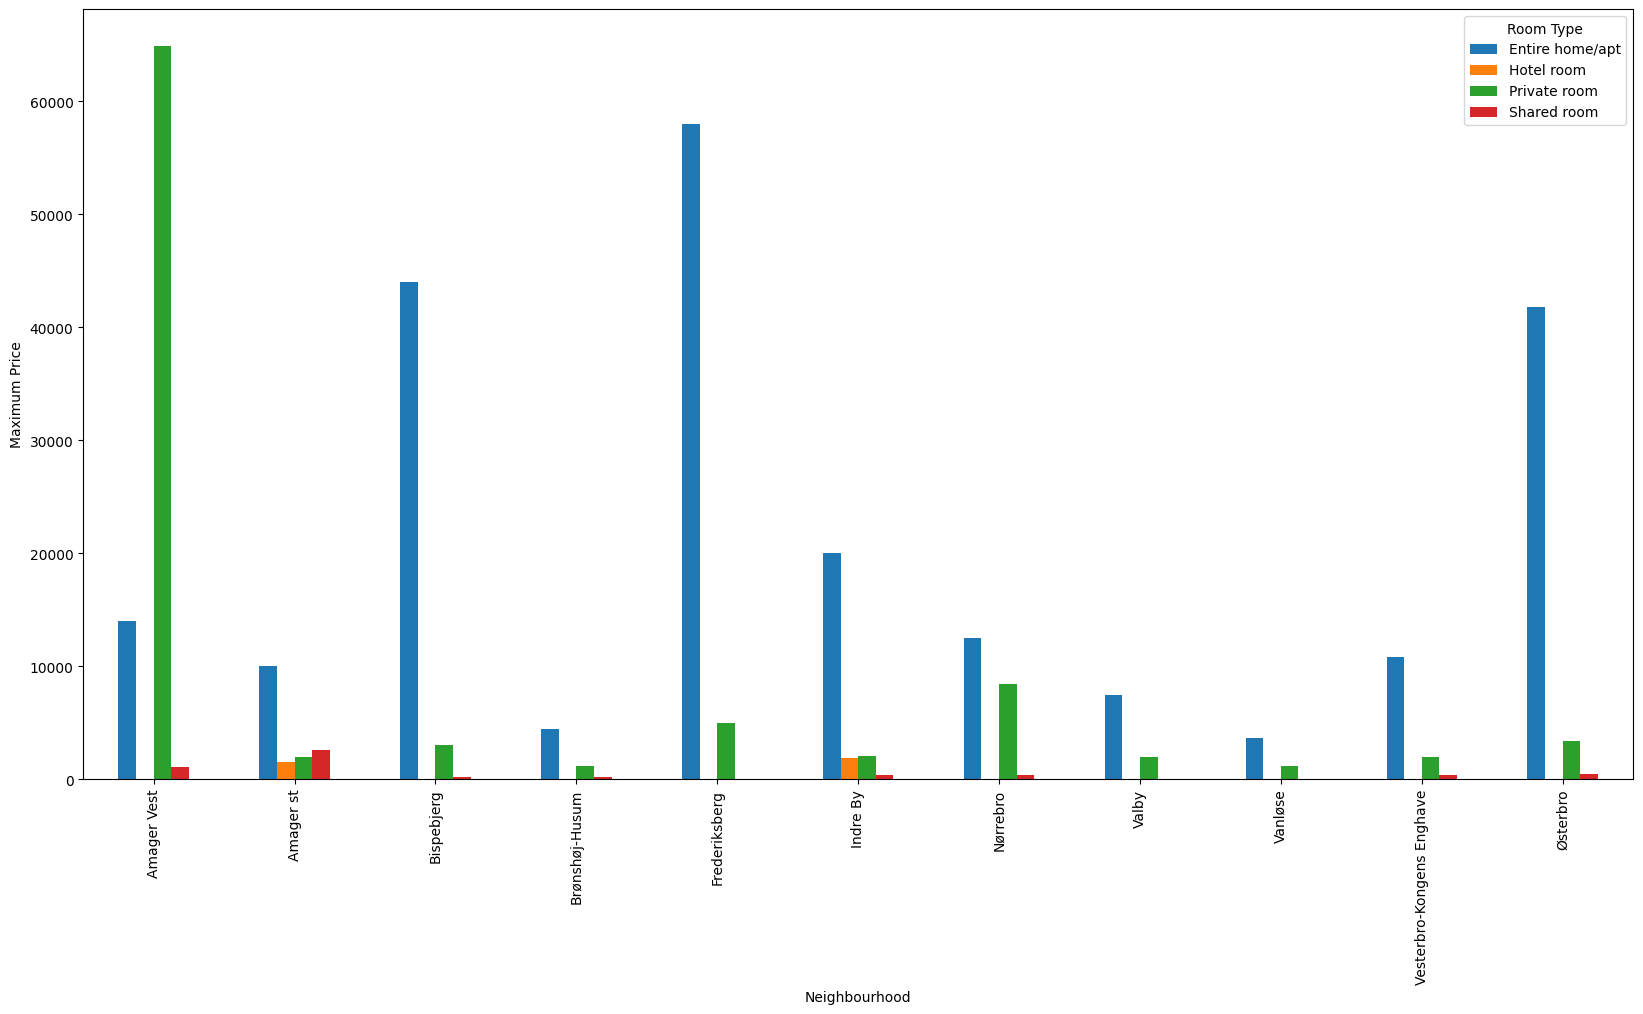

In [101]:
df4.price.max().unstack().plot.bar(figsize=(20, 10))

plt.xlabel("Neighbourhood")
plt.ylabel("Maximum Price")
plt.legend(title="Room Type")

plt.show()

#### **Standard Deviation/Variance**

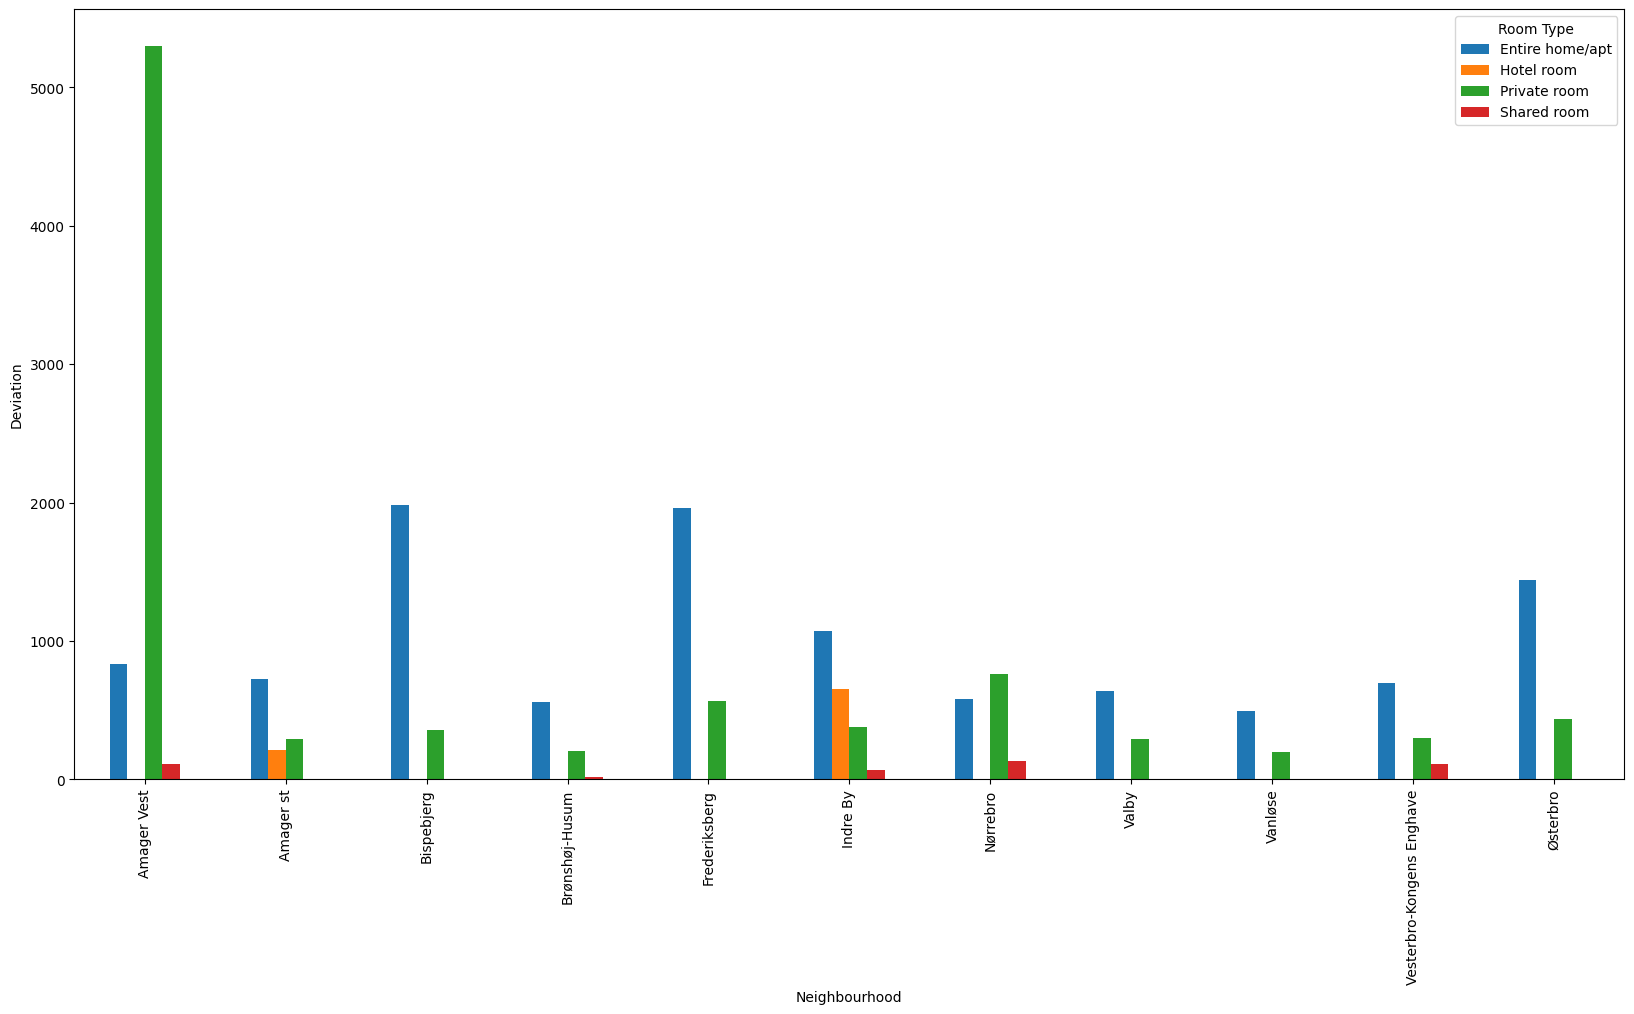

In [102]:
df4.price.std().unstack().plot.bar(figsize=(20, 10))

plt.xlabel("Neighbourhood")
plt.ylabel("Deviation")
plt.legend(title="Room Type")

plt.show()


#### **Quartiles**

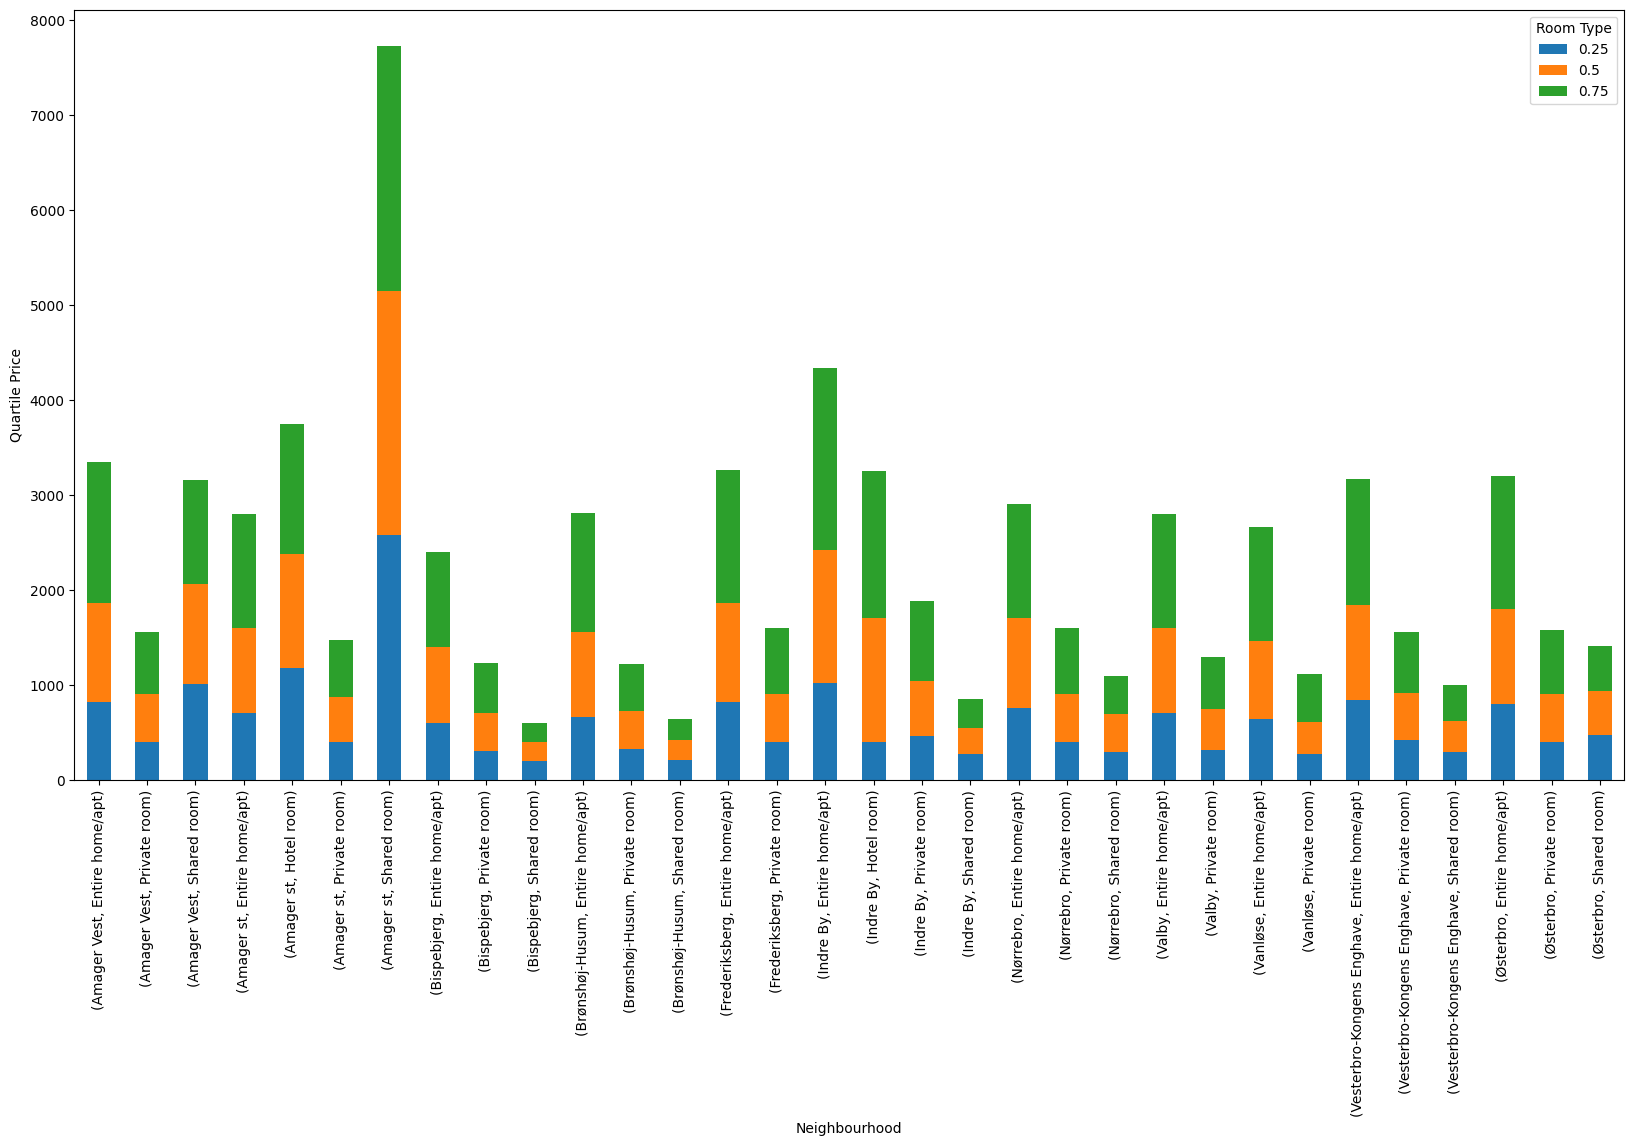

In [103]:
# A quantile is a part of quartiles
df4.price.quantile([0.25, 0.5, 0.75]).unstack().plot.bar(stacked=True, figsize=(20, 10))

plt.xlabel("Neighbourhood")
plt.ylabel("Quartile Price")
plt.legend(title="Room Type")

plt.show()

### 5. Based on self-chosen features, and with "price_category" as your target, develop a k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [104]:
# Data Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split

features = ["room_type", "neighbourhood_cleansed", "availability_365", "number_of_reviews", "review_scores_rating", "latitude", "longitude", "minimum_nights"]
target = "price_category"

X = data_filtered[features]
X_new = pd.get_dummies(X, drop_first=True)
y = data_filtered[target]

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [105]:
# Model Training
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neighbors_range = range(3, 50) 
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

best_accuracy = 0
best_params = {'n_neighbors': None, 'metric': None}

for n_neighbors in neighbors_range:
    for metric in distance_metrics:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)

        knn.fit(X_train, y_train)

        predictions = knn.predict(X_test)

        accuracy = accuracy_score(y_test, predictions)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['n_neighbors'] = n_neighbors
            best_params['metric'] = metric

print(f"Best parameters: Number of Neighbors - {best_params['n_neighbors']}, Distance Metric - {best_params['metric']}")
print(f"Highest Accuracy: {best_accuracy*100:.2f}%")

Best parameters: Number of Neighbors - 39, Distance Metric - manhattan
Highest Accuracy: 62.04%


#### **Model Observations**

#### 1. Model Performance 
The K-Nearest Neighbors (KNN) classifier was trained using different values of **n_neighbors** (ranging from 3 to 50) and three distance metrics (**Euclidean, Manhattan, and Minkowski**). The highest accuracy achieved was **62.04%**, using **39 neighbors** with the **Manhattan** distance metric.  

- **Impact of Distance Metric** 

    - Manhattan Distance performed best, likely due to grid-like patterns in the data.
    - Euclidean & Minkowski had slightly lower accuracy, possibly indicating non-linear relationships.

- **Impact of Number of Neighbors (n_neighbors)** 
    - Lower n_neighbors can lead to overfitting, capturing _"noise"_ in the data.
    - Higher values may cause underfitting, reducing sensitivity to local variations.  
    - Optimal value (39 neighbors) provided a good balance.

#### 2. Accuracy Interpretation
- The **62.04% accuracy** indicates that the model performs better than random guessing (which would be around 50% for a binary classification task).  
- However, the performance suggests room for improvement, possibly through **feature engineering, hyperparameter tuning, or trying different classification models** like Decision Trees or Random Forests.  


#### 3. Future Improvements

- Feature engineering (scaling, additional variables) could enhance results.
- Trying other models (e.g., Random Forest, SVM) might provide better accuracy.